In [1]:
import numpy as np 
import pandas as pd

# Data Description | Descrição dos Dados

In [2]:
raw_data = pd.read_csv('../input/indian-food-101/indian_food.csv')
raw_data.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [4]:
#Dropping nulls | Retirando valores nulos
data = raw_data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            254 non-null    object
 1   ingredients     254 non-null    object
 2   diet            254 non-null    object
 3   prep_time       254 non-null    int64 
 4   cook_time       254 non-null    int64 
 5   flavor_profile  254 non-null    object
 6   course          254 non-null    object
 7   state           254 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 19.8+ KB


In [5]:
#Changing "-1" values in categorical variables to "Unknown" | 
#Mudando valores "-1" de variaveis categoricas para "Unkown" (Desconhecido)


categorical_cols = [col for col in data.columns if data[col].dtype == 'object']
a = {}
for col in categorical_cols:
    a[col] = '-1'
data = data.replace(a, "Unknown")

In [6]:
data.describe()

,prep_time,cook_time
count,254.000000,254.000000
mean,31.188976,34.566929
std,72.685497,48.357217
min,-1.000000,-1.000000
25%,10.000000,20.000000
50%,10.000000,30.000000
75%,20.000000,40.000000
max,500.000000,720.000000


# Data Visualization | Visualização dos Dados

Text(0.5, 0, 'Preparation time / Tempo de preparação')

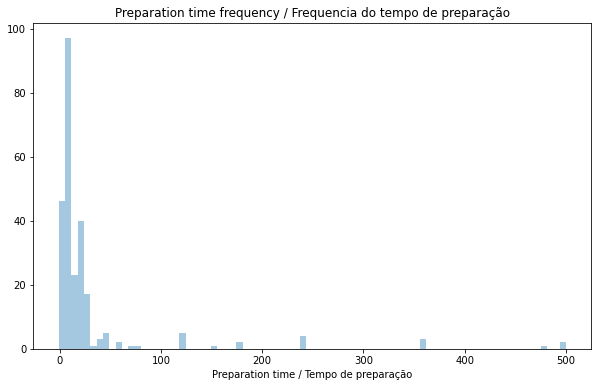

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(10, 6))

sns.distplot(data['prep_time'], kde=False, bins=80)
plt.title('Preparation time frequency / Frequencia do tempo de preparação')
plt.xlabel('Preparation time / Tempo de preparação')

Text(0.5, 0, 'Cook time / Tempo de cozimento')

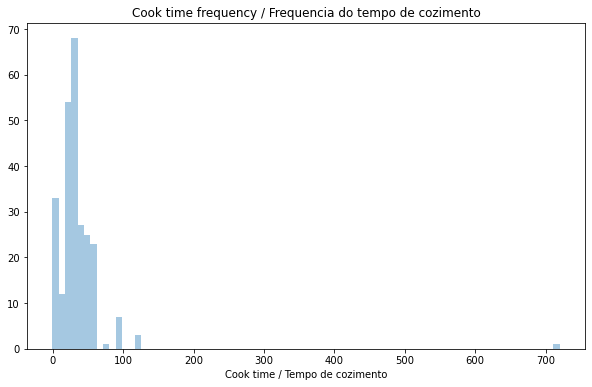

In [8]:
plt.figure(figsize=(10, 6))
sns.distplot(data['cook_time'], kde=False, bins=80)
plt.title('Cook time frequency / Frequencia do tempo de cozimento')
plt.xlabel('Cook time / Tempo de cozimento')

In [9]:
total_time = [total for total in data['cook_time'] + data['prep_time']]
data = data.join(pd.DataFrame(total_time, columns=['total_time']))
data.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,total_time
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East,70.0
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West,110.0
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North,75.0
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West,45.0
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East,55.0


Text(0.5, 1.0, 'Total time frequency / Frequencia de tempo total')

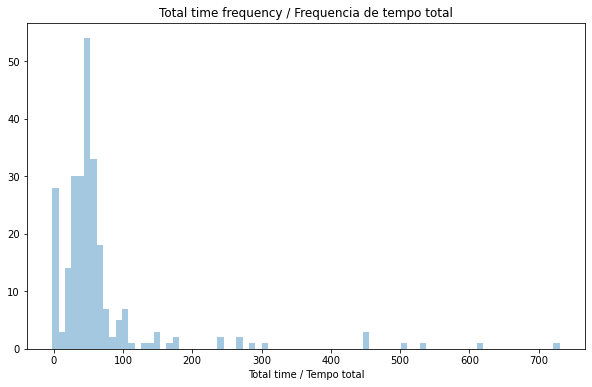

In [10]:
plt.figure(figsize=(10, 6))
sns.distplot(data['total_time'], kde=False, bins=80)
plt.xlabel('Total time / Tempo total')
plt.title('Total time frequency / Frequencia de tempo total')

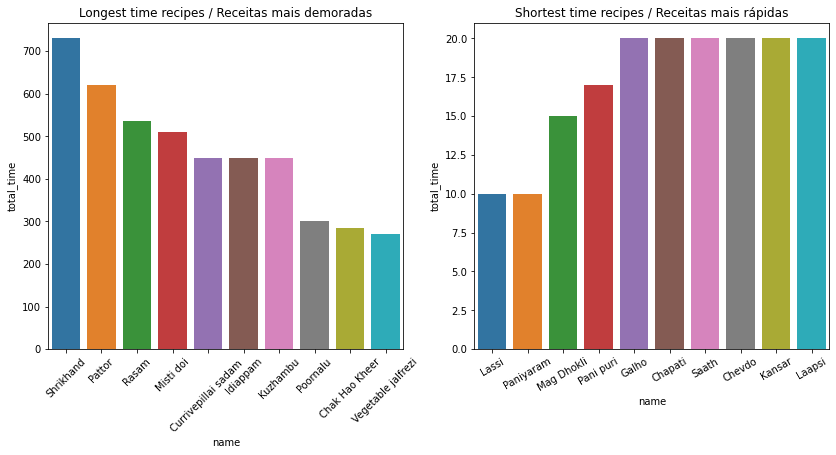

In [11]:
plt.figure(figsize=(14, 6))

plt.subplot(121)
plt.xticks(rotation=45)
plt.title('Longest time recipes / Receitas mais demoradas')
sns.barplot(y='total_time', x='name', data=data.nlargest(10, 'total_time')) 

plt.subplot(122)
plt.title('Shortest time recipes / Receitas mais rápidas')
plt.xticks(rotation=30)
sns.barplot(y='total_time', x='name', data=data.query('total_time >= 0').nsmallest(10, 'total_time'))

Text(0, 0.5, '')

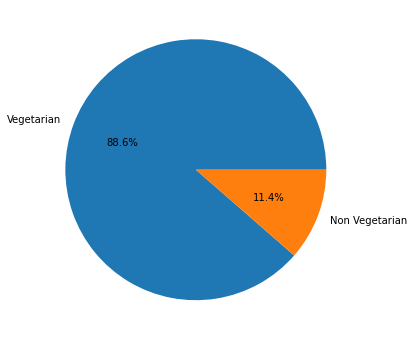

In [12]:
plt.figure(figsize=(10, 6))
data['diet'].value_counts().plot.pie(labels=['Vegetarian', 'Non Vegetarian'], autopct='%1.1f%%')
plt.ylabel('')

Text(0, 0.5, 'Cook time / Tempo de cozimento')

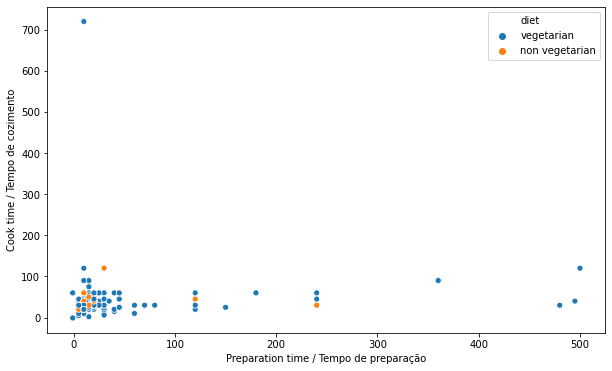

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='prep_time', y='cook_time', data=data, hue='diet')
plt.xlabel('Preparation time / Tempo de preparação')
plt.ylabel('Cook time / Tempo de cozimento')

Text(0.5, 1.0, 'Recipes per state / Receitas por estado')

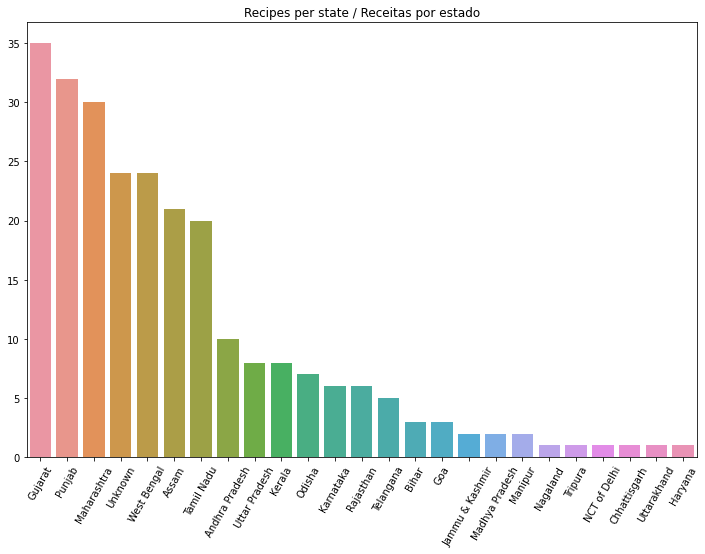

In [14]:
recipes_per_state = data['state'].value_counts()

plt.figure(figsize=(12, 8))
plt.tick_params(axis='x', labelrotation=60)

sns.barplot(x=recipes_per_state.index, y=recipes_per_state.values)
plt.title('Recipes per state / Receitas por estado')

Text(0, 0.5, 'Count / Contagem')

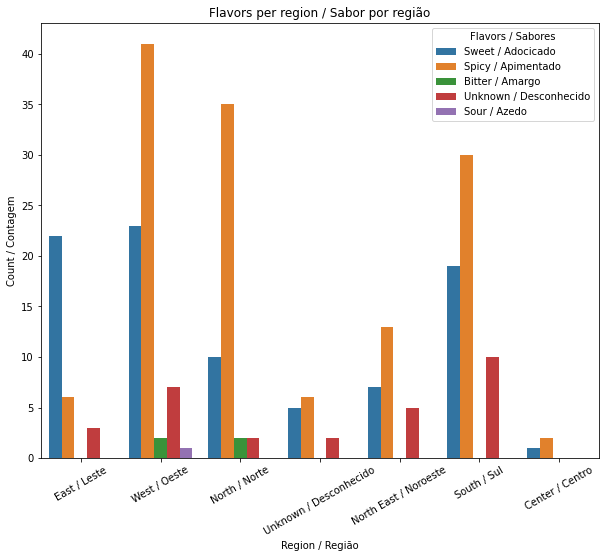

In [15]:
plt.figure(figsize=(10,8))
plt.title('Flavors per region / Sabor por região')
sns.countplot(data=data, x='region', hue='flavor_profile')
plt.xlabel('Region / Região')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['East / Leste', 'West / Oeste', 'North / Norte', 
                   'Unknown / Desconhecido', 'North East / Noroeste', 'South / Sul', 'Center / Centro'], 
           rotation=30)
plt.legend(['Sweet / Adocicado', 'Spicy / Apimentado', 'Bitter / Amargo', 'Unknown / Desconhecido', 'Sour / Azedo'], 
           title='Flavors / Sabores', loc='upper right')
plt.ylabel('Count / Contagem')

In [16]:
#Function for filtering ingredients

def filter_ingredients(column):
    
    values = data[column].unique()
    
    temp_datasets = []
    
    out = {}
    
    for value in values:
        temp_datasets.append(data.query('{0} == "{1}"'.format(column, value)))
    
    
    all_ingredients = np.array([])
    ingredients_per_filter = []

    for dataset in temp_datasets:
        recipes = [ing.lower().split(', ') for ing in dataset['ingredients']]
        for ingredients in recipes:
            for ingredient in ingredients:
                all_ingredients = np.append(all_ingredients, ingredient.strip())
        ingredients_per_filter.append(pd.Series(all_ingredients))
    
    for value in range(len(values)):
        out[values[value]] = ingredients_per_filter[value]
    
    return out

([<matplotlib.axis.XTick at 0x7fd0801ec310>,
 [Text(0, 0, 'Sugar'),
  Text(0, 0, 'Ginger'),
  Text(0, 0, 'Garam masala'),
  Text(0, 0, 'Ghee'),
  Text(0, 0, 'Urad dal'),
  Text(0, 0, 'Curry leaves'),
  Text(0, 0, 'Milk'),
  Text(0, 0, 'Rice flour'),
  Text(0, 0, 'Jaggery'),
  Text(0, 0, 'Chana dal')])

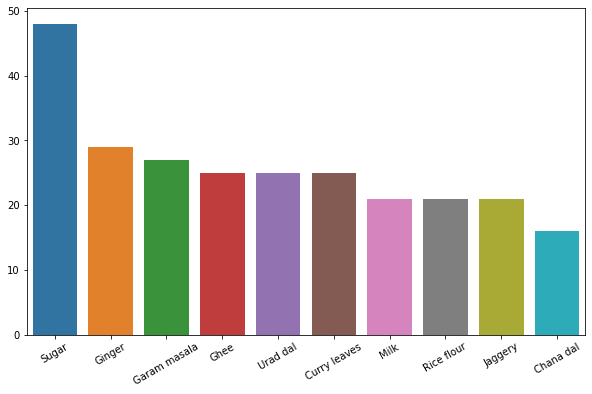

In [17]:
recipes = [ing.lower().split(', ') for ing in data['ingredients']]

all_ingredients = np.array([])

for ingredients in recipes:
    for ingredient in ingredients:
        all_ingredients = np.append(all_ingredients, ingredient.strip())

all_ingredients = pd.Series(all_ingredients)
most_used = all_ingredients.value_counts()[0:10]
labels=[label.capitalize() for label in most_used.index]

plt.figure(figsize=(10,6))

sns.barplot(x=most_used.index, y=most_used.values)
plt.xticks(rotation=30, labels=labels, ticks=range(10))

In [18]:
data['ingredients'].update([low.lower() for low in data['ingredients']])
data

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,total_time
0,Balu shahi,"maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East,70.0
1,Boondi,"gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West,110.0
2,Gajar ka halwa,"carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North,75.0
3,Ghevar,"flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West,45.0
4,Gulab jamun,"milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East,55.0
...,...,...,...,...,...,...,...,...,...,...
250,Til Pitha,"coconut milk, egg yolks, clarified butter, all...",vegetarian,5,30,sweet,dessert,Assam,North East,80.0
251,Bebinca,"cottage cheese, dry dates, dried rose petals, ...",vegetarian,20,60,sweet,dessert,Goa,West,-2.0
252,Shufta,"milk powder, dry fruits, arrowroot powder, all...",vegetarian,-1,-1,sweet,dessert,Jammu & Kashmir,North,65.0
253,Mawa Bati,"brown rice, fennel seeds, grated coconut, blac...",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central,-2.0


([<matplotlib.axis.XTick at 0x7fd07fff2350>,
 [Text(0, 0, 'Sugar'),
  Text(0, 0, 'Ginger'),
  Text(0, 0, 'Garam masala'),
  Text(0, 0, 'Curry leaves'),
  Text(0, 0, 'Ghee'),
  Text(0, 0, 'Urad dal'),
  Text(0, 0, 'Rice flour'),
  Text(0, 0, 'Milk'),
  Text(0, 0, 'Jaggery'),
  Text(0, 0, 'Tomato'),
  Text(0, 0, 'Chana dal'),
  Text(0, 0, 'Gram flour'),
  Text(0, 0, 'Garam masala powder'),
  Text(0, 0, 'Mustard oil'),
  Text(0, 0, 'Wheat flour')])

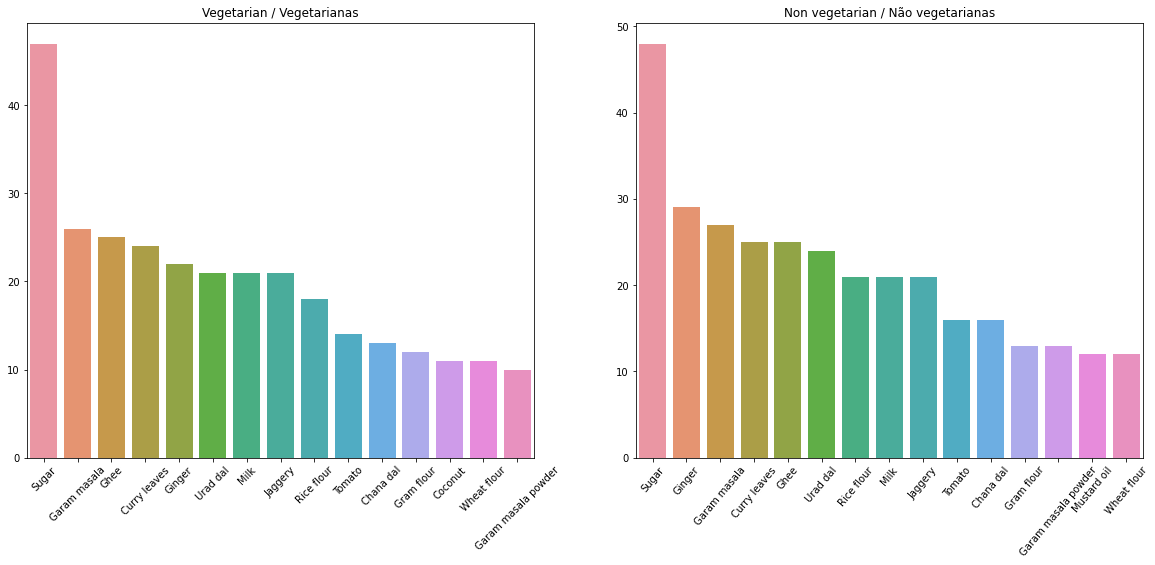

In [19]:
ingredients_per_diet = filter_ingredients('diet')

#Plot the most used for vegetarian and non vegetarian recipes

veg_most_used = ingredients_per_diet['vegetarian'].value_counts()[0:15]
veg_labels = [label.capitalize() for label in veg_most_used.index]

non_veg_most_used = ingredients_per_diet['non vegetarian'].value_counts()[0:15]
non_veg_labels = [label.capitalize() for label in non_veg_most_used.index]

plt.figure(figsize=(20,8))


plt.subplot(121)
plt.title('Vegetarian / Vegetarianas')
sns.barplot(x=veg_most_used.index, y=veg_most_used.values)
plt.xticks(rotation=45, labels=veg_labels, ticks=range(15))

plt.subplot(122)
plt.title('Non vegetarian / Não vegetarianas')
sns.barplot(x=non_veg_most_used.index, y=non_veg_most_used.values)
plt.xticks(rotation=50, labels=non_veg_labels, ticks=range(15))


(-0.5, 1599.5, 799.5, -0.5)

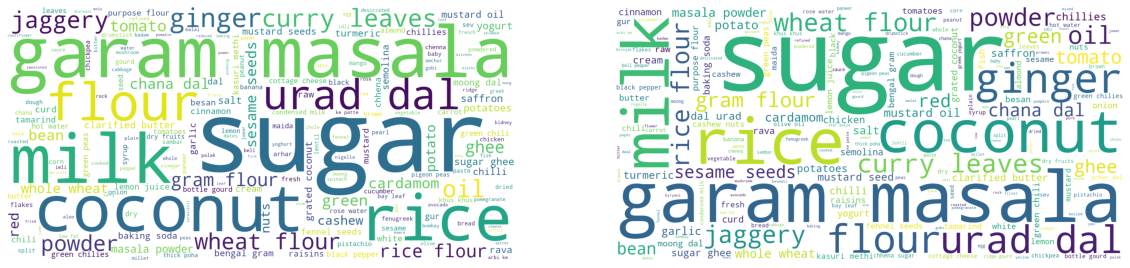

In [20]:
#Other Vizualization

from wordcloud import WordCloud

plt.figure(figsize=(20, 8))

plt.subplot(121)
wordcloud_veg = WordCloud(background_color='white', width=1600, height=800).generate(' '.join(ingredients_per_diet['vegetarian']))
plt.imshow(wordcloud_veg)
plt.axis('off')

plt.subplot(122)
wordcloud_non_veg = WordCloud(background_color='white', width=1600, height=800).generate(' '.join(ingredients_per_diet['non vegetarian']))
plt.imshow(wordcloud_non_veg)
plt.axis('off')

This is my first public notebook, any tips or commentaries are welcome. Este é meu primeiro notebook, quaisquer dicas ou comentários são bem vindos.

Thank you. Obrigado.